<a href="https://colab.research.google.com/github/LeandroCoelhos/regressao/blob/main/%236-regularizacao_ibov/regulariza%C3%A7%C3%A3o_ibov_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introdução mercado de ações

Algumas empresas, no Brasil tipicamente **grandes** empresas são listadas na Bolsa de Valores. O que isso significa?

 - Em um dado momento, para investir e crescer no mercado, a empresa **abre sua sociedade para novos investidores**
   - Isso quer dizer que ela permite que, qualquer pessoa disposta, possa comprar uma pequena participação e se tornar sócio da empresa
   - O *custo* dessa compra entra para o capital da empresa, que então pode investir como quiser
   - Note que os novos proprietários, em tese, podem opinar sobre esse investimento
   
 - Mas <u>mesmo depois dessa abertura</u>, esses proprietários podem, a qualquer momento, **vender sua participação para outras pessoas**.
   - O mercado de ações que vemos às vezes no noticiário em geral se refere justamente a esse **mercado secundário**: pessoas vendendo ou comprando participações de empresas
   
#### Mas o que é o tal do "preço da ação", que varia loucamente?

 - Nada mais é do que **o preço do último negócio realizado**
   - Quanto vale uma ação? O <u>preço que as pessoas estão dispostas a pagar por elas</u>
   
<hr />

# Ok, e o que isso tem a ver com Machine Learning?

Talvez você já tenha ouvido falar sobre **fundos de investimento**.

 - São um "produto" em que, pessoas que não querem acompanhar o mercado por conta própria "entregam" seu dinheiro para que um **administrador** invista por elas, e divida o retorno entre todos os investidores (**cotistas**)
 
Aqui trataremos só de fundos que investem em **ações**.

Em geral, a <u>estratégia</u> de um fundo de investimento é secreta. Por regulação, após 3 meses, um fundo é obrigado a mostrar em que ele estava investido, até como uma forma dos investidores verificarem se ele está fazendo o que prometeu fazer.

Entretanto, "descobrir" a posição de um fundo pode ser interessante para decisões estratégias. E uma das formas de se fazer isso **aproximadamente** é com a Regressão LASSO.

<hr />

### Mas não vamos tão fundo, vamos ficar no mais simples

Esse ramo tem <u>MUITOS</u> detalhes de tratamentos e características que não lidaremos aqui. Para simplificar vamos lidar com o **índice bovespa**, que funciona como se fosse um **fundo teórico**:

 - De tempos em tempos, a B3 (Bolsa de São Paulo) seleciona algumas ações por alguns critérios (divulgados) e cria esse índice
   - Ele, basicamente, diz "um fundo que investisse nessas ações, nessas proporções, renderia tanto"
   - É uma forma simplificada de entender como o mercado como um todo se comporta.
   
### Nosso objetivo:

 - "Descobrir" quais eram as ações que compunham o índice em um dado período
 
#### Referências:
>
> - Sobre o índice Bovespa: http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm
> - Composição do índice hoje: http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

In [2]:
df = pd.read_csv('retornos_ibov.csv')
df

,datetime,AALR3,ABEV3,ADHM3,AERI3,AFLT3,AGRO3,ALPA3,ALPK3,ALSO3,...,VLID3,VULC3,VVAR3,WEGE3,WIZS3,WSON33,XBOV11,XINA11,XPIE11,YDUQ3
0,2019-08-20,0.000000,-0.008896,-0.019108,-0.061538,0.055276,0.036697,-0.011845,0.026178,0.013740,...,0.000000,0.008902,0.049034,0.002662,0.019081,-0.023263,-0.002250,-0.005964,-1.000000,0.045716
1,2019-08-21,0.009714,-0.007392,-0.025974,-0.061538,-0.107937,-0.008850,-0.008299,0.026178,0.001626,...,0.031356,0.010294,0.016997,0.020354,-0.011064,0.066502,0.019268,-0.005964,-1.000000,0.004280
2,2019-08-22,0.023769,-0.017553,0.000000,-0.061538,0.067616,0.017857,0.020456,0.026178,-0.014885,...,0.033689,0.011645,-0.038997,-0.014310,-0.001721,0.014791,-0.011664,-0.005964,-1.000000,-0.010350
3,2019-08-23,-0.024323,-0.007580,-0.033333,-0.061538,0.000000,-0.016959,0.001822,0.026178,-0.016758,...,-0.035771,-0.041727,-0.015942,-0.022437,-0.008621,-0.021149,-0.023298,-0.005964,0.000000,-0.053214
4,2019-08-26,0.010765,-0.013093,-0.013793,-0.061538,0.000000,-0.027365,-0.022283,0.026178,-0.008103,...,-0.045342,-0.003003,-0.045655,-0.030153,-0.020870,-0.004380,-0.012604,-0.005964,0.000000,0.001624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2020-06-24,-0.040930,-0.017947,-0.064151,-0.061538,-0.040747,0.024594,-0.024880,-0.058642,-0.027304,...,-0.048257,-0.007937,-0.029940,-0.001518,-0.006146,-0.026987,-0.016663,-0.005964,-0.012903,-0.051822
210,2020-06-25,0.032008,0.036550,0.008065,-0.061538,0.009735,0.021450,0.000823,0.021858,0.013333,...,0.005634,0.006000,-0.002058,0.068838,-0.015018,-0.004622,0.017809,-0.005964,0.013072,-0.010817
211,2020-06-26,-0.041353,-0.016220,-0.004000,-0.061538,0.032428,0.000000,-0.013158,-0.016043,-0.050208,...,-0.036415,-0.001988,-0.017869,0.015847,-0.034081,-0.024768,-0.022163,-0.005964,0.010753,-0.047770
212,2020-06-29,-0.001961,0.022222,0.028112,-0.061538,-0.023769,0.042500,0.000000,-0.005435,0.038279,...,0.047481,0.033865,0.076277,-0.001600,0.025998,0.062540,0.018870,-0.005964,-0.010851,0.034451


In [3]:
df = df.set_index('datetime')
df

,AALR3,ABEV3,ADHM3,AERI3,AFLT3,AGRO3,ALPA3,ALPK3,ALSO3,ALUP11,...,VLID3,VULC3,VVAR3,WEGE3,WIZS3,WSON33,XBOV11,XINA11,XPIE11,YDUQ3
datetime,,,,,,,,,,,,,,,,,,,,,
2019-08-20,0.000000,-0.008896,-0.019108,-0.061538,0.055276,0.036697,-0.011845,0.026178,0.013740,-0.011650,...,0.000000,0.008902,0.049034,0.002662,0.019081,-0.023263,-0.002250,-0.005964,-1.000000,0.045716
2019-08-21,0.009714,-0.007392,-0.025974,-0.061538,-0.107937,-0.008850,-0.008299,0.026178,0.001626,0.011788,...,0.031356,0.010294,0.016997,0.020354,-0.011064,0.066502,0.019268,-0.005964,-1.000000,0.004280
2019-08-22,0.023769,-0.017553,0.000000,-0.061538,0.067616,0.017857,0.020456,0.026178,-0.014885,0.001942,...,0.033689,0.011645,-0.038997,-0.014310,-0.001721,0.014791,-0.011664,-0.005964,-1.000000,-0.010350
2019-08-23,-0.024323,-0.007580,-0.033333,-0.061538,0.000000,-0.016959,0.001822,0.026178,-0.016758,-0.015504,...,-0.035771,-0.041727,-0.015942,-0.022437,-0.008621,-0.021149,-0.023298,-0.005964,0.000000,-0.053214
2019-08-26,0.010765,-0.013093,-0.013793,-0.061538,0.000000,-0.027365,-0.022283,0.026178,-0.008103,-0.011811,...,-0.045342,-0.003003,-0.045655,-0.030153,-0.020870,-0.004380,-0.012604,-0.005964,0.000000,0.001624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.040930,-0.017947,-0.064151,-0.061538,-0.040747,0.024594,-0.024880,-0.058642,-0.027304,-0.018953,...,-0.048257,-0.007937,-0.029940,-0.001518,-0.006146,-0.026987,-0.016663,-0.005964,-0.012903,-0.051822
2020-06-25,0.032008,0.036550,0.008065,-0.061538,0.009735,0.021450,0.000823,0.021858,0.013333,0.012600,...,0.005634,0.006000,-0.002058,0.068838,-0.015018,-0.004622,0.017809,-0.005964,0.013072,-0.010817
2020-06-26,-0.041353,-0.016220,-0.004000,-0.061538,0.032428,0.000000,-0.013158,-0.016043,-0.050208,-0.007466,...,-0.036415,-0.001988,-0.017869,0.015847,-0.034081,-0.024768,-0.022163,-0.005964,0.010753,-0.047770


In [4]:
X = df.drop('BOVA11', axis=1)
y = df.BOVA11

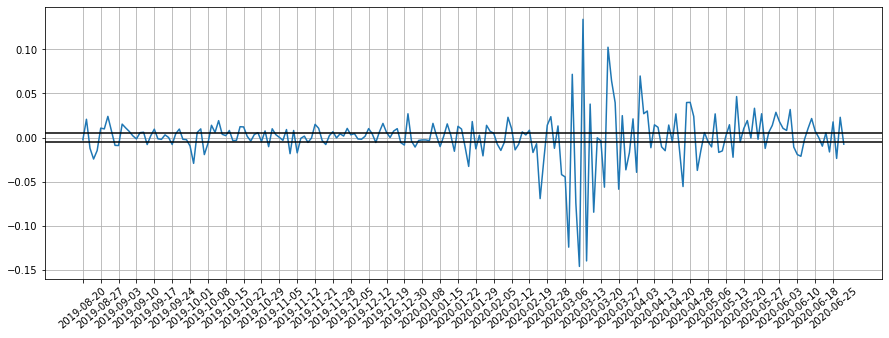

In [13]:
plt.figure(figsize=(15,5))
plt.plot(y)
plt.xticks(y.index[::5],rotation=40);
plt.grid();
plt.axhline(0.005, color='k')# passar uma linha horizontal
plt.axhline(-0.005, color='k')

## O que é essa tal "série de retornos"?

 - É a variação no <u>preço</u>, dia após dia. 
   - Nós trabalhamos com essa série por ela ser **estacionária**: A variação no preço de um dia, em princípio, não depende dos dias anteriores. Cada dia é um novo dia
   
 - Mas se nós compramos uma ação, <u>esses retornos se acumulam</u>.
   - Exemplo:
     - Eu comprei uma ação por $R\$10,00$
     - No dia seguinte, a última pessoa que comprou esse mesmo papel pagou $R\$10,10$ (valorização de $1\%$)
     - No próximo dia, a última pessoa que comprou esse mesmo papel pagou $R\$10,21$ (valorização de $1\%$)
       - Note que, <u>em relação ao valor que eu paguei</u>, a ação se valorizou $2.1\%$


Podemos sumarizar esse efeito com da seguinte forma:

$$
retorno_{\; 2 \; dias} = (1+retorno_{\; 1º dia}) \cdot (1+retorno_{\; 2º dia})
$$

Ou, da forma mais geral:

$$
\begin{align*}
retorno_{\; t_1 \rightarrow t_2} &= (1+retorno_{\; t_1}) \cdot (1+retorno_{\; t_1+1}) \cdots (1+retorno_{\; t_2})\\
\\
retorno_{\; t_1 \rightarrow t_2} &=\prod_{i=t_1}^{t_2} (1+retorno_{\; t_i})
\end{align*}
$$

Para observar esse efeito, podemos utilizar o método `cumprod`:

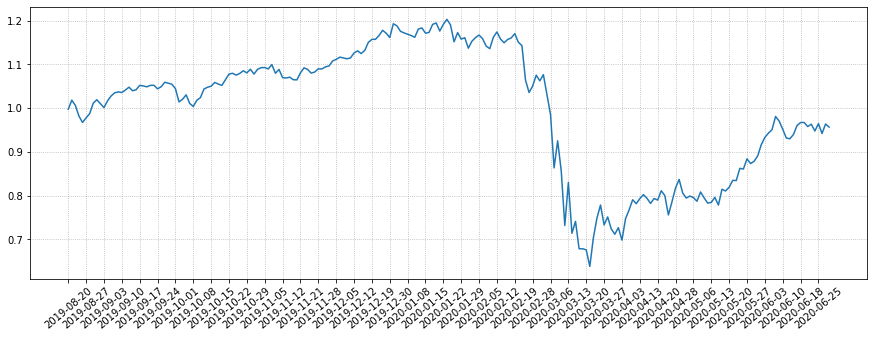

In [12]:
plt.figure(figsize=(15,5))
plt.plot((1+y).cumprod())
plt.xticks(y.index[::5],rotation=40)
plt.grid(linestyle=':')

# Agora é bem mais parecido com o que vemos nos jornais né?

Significa que alguém que comprou exatamente o índice Bovespa em 20/Ago/2019, hoje teria cerca de $95\%$ do valor investido, ou seja, houve uma **perda** de cerca de 5 pontos porcentuais.

Isso claro, se a pessoa comprou e não fez mais nada.

<hr />

Ok, mas vamos voltar ao nosso **objetivo**:

 - "Descobrir" quais eram as ações que compunham o índice iBov em um dado período
 
O que isso significa? Se olharmos nossas **variáveis preditivas**, temos a série de retorno de cada ação (não há todas aqui, só algumas selecionadas)

Por exemplo:

In [ ]:
# Tentar uma série acomulada
X.cumsum(axis=1) #pode introduzir um viés

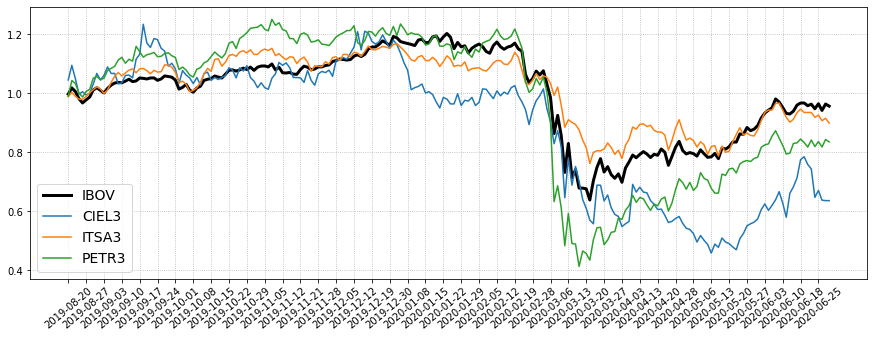

In [7]:
plt.figure(figsize=(15,5))
plt.plot((1+y).cumprod(), color='k', lw=3, label='IBOV')
plt.plot((1+X['CIEL3']).cumprod(), label='CIEL3')
plt.plot((1+X['ITSA3']).cumprod(), label='ITSA3')
plt.plot((1+X['PETR3']).cumprod(), label='PETR3')
plt.xticks(y.index[::5],rotation=40)
plt.grid(linestyle=':')
plt.legend(fontsize=14)

## Hipótese da minha regressão linear

$$
y \approx X_1 \cdot \beta_1 + X_2 \cdot \beta_2 + \cdots
$$

Em resumo, nosso objetivo é descobrir **como compor a curva preta a partir de combinações das várias curvas coloridas**.

### Estratégia

Para isso, utilizaremos nossa **Regressão LASSO** (Regressão Linear com regularização $L_1$).
>
> - Ações que não tem nada a ver com o índice terão seu coeficiente naturalmente zerado

<hr />

Mas não necessariamente teremos um modelo bom ou que faz algum sentido. Precisamos <u>sempre</u> ter meios de validar nossos resultados de alguma forma.

Assim, como todo modelo de Machine Learning, faremos nossa **separação em treino e teste**.

Aqui no caso, como os dados possuem <u>característica temporal</u>, faremos essa separação **Out-Of-Time**, ou seja, o modelo aprende com dados do **passado**, e validamos sua qualidade no **futuro**:

In [36]:
#Desafio - reamostrar o conjunto de treino para criar um de validação
X_tr_t = X.loc[X.index < '2020-01-01']
y_tr_t = y.loc[X.index < '2020-01-01']
X_ts_t = X.loc[X.index >='2020-01-01']
y_ts_t = y.loc[X.index >='2020-01-01']

from sklearn.model_selection import train_test_split
#novo conjunto os sample e of time
X_tr_s, X_ts_s, y_tr_s, y_ts_s = train_test_split(X_tr_t, y_tr_t, test_size=.3, random_state=646)

# Vamos ver graficamente como ficou essa nova divisão

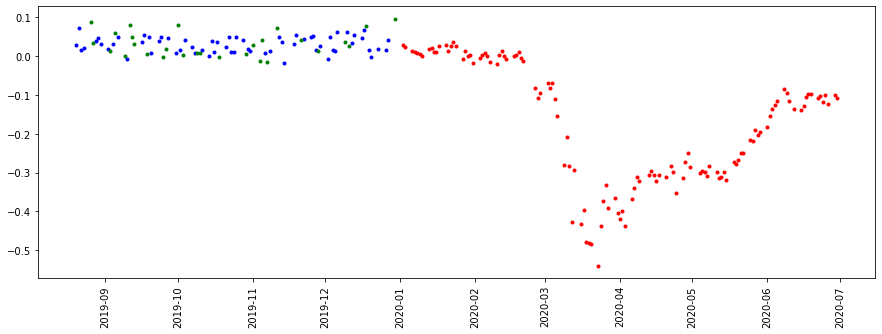

In [39]:
plt.figure(figsize=(15,5))
plt.plot(pd.to_datetime(y_tr_s.index),(y_tr_s).sort_index().cumsum(), 'b.')
plt.plot(pd.to_datetime(y_ts_s.index),(y_ts_s).sort_index().cumsum(), 'g.')
plt.plot(pd.to_datetime(y_ts_t.index),(y_ts_t).sort_index().cumsum(), 'r.')
plt.xticks(rotation=90);

In [40]:
from sklearn.linear_model import LassoLarsCV

lasso = LassoLarsCV(normalize=True) # ja faz o grid dentro dele
lasso.fit(X_tr_s,y_tr_s)

from sklearn.metrics import mean_absolute_error
print('out-of-sample: ', mean_absolute_error(y_ts_s, lasso.predict(X_ts_s)))
print('out-of-time: ', mean_absolute_error(y_ts_t, lasso.predict(X_ts_t)))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


out-of-sample:  0.0019062691552856749
out-of-time:  0.0046872464797682615


### O erro absoluto médio parece bom...

### será que nossos resídos estão simétricos? Ou o modelo apresenta viés?

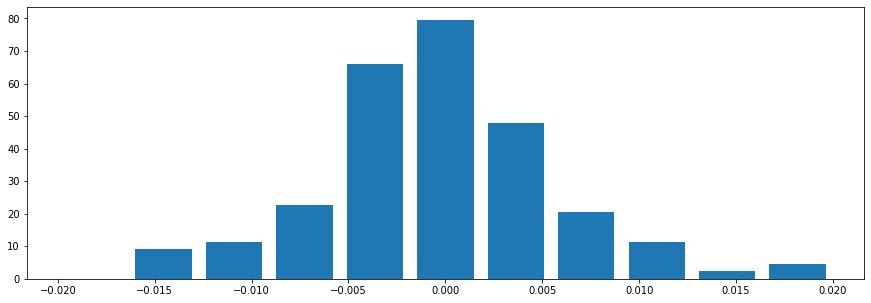

In [41]:
plt.figure(figsize=(15,5))
plt.hist(lasso.predict(X_ts_t)-y_ts_t, bins=np.linspace(-0.02, 0.02, 12), rwidth=.8, density=True);

# Legal! Parece bom!
Os erros aparenta seguir uma distribuição normal

Vamos ver os coeficientes!

In [42]:
order = np.argsort(np.abs(lasso.coef_))[::-1]

for col,coef in zip(X.columns[order], lasso.coef_[order]):
    if coef==0:
        continue
    print(f'{col:7s} : {coef:.3f}')

PIBB11  : 0.288
XBOV11  : 0.226
BRAX11  : 0.117
BBAS3   : 0.046
PETR3   : 0.039
DIVO11  : 0.033
BBSE3   : 0.027
CVCB3   : 0.018
BBDC3   : 0.016
IRBR3   : 0.015
ENAT3   : 0.013
ABEV3   : 0.013
LREN3   : 0.009
USIM5   : 0.009
SCAR3   : -0.008
UNIP6   : 0.007
HYPE3   : 0.007
LAME3   : 0.005
POSI3   : 0.005
BRKM5   : 0.004
HGTX3   : 0.004
GRND3   : 0.003
PRIO3   : 0.003
SLCE3   : 0.001
OMGE3   : 0.000


# Parece bom!

Mas na hora que formos validar isso com a área de negócio, ela dirá que **o modelo tem um erro**.

Não por um erro técnico, mas pela **falta de um conceito de negócio**

Alguns dos papéis negociados na bolsa <u>não são ações de empresas</u>. Na verdade, **todos os papéis terminados com o número 11 são fundos**. O que isso significa?

Algumas pessoas criam uma **cesta de ações**, comprando diversos papéis de várias empresas de acordo com algum critério (como o próprio índice Bovespa), e vendem "pedaços" (cotas) dessas cestas como se fossem ações.

Por exemplo:

 - PIBB11: Uma cesta composta de ações negociadas na **iBRX-50**
 - XBOV11: Uma cesta que visa **replicar o índice Bovespa**
 - BRAX11: Uma cesta que visa **replicar o índice IBR-X** (mesma ideia do Bovespa, mas com outros critérios)
 - SMAL11: Uma cesta composta só de ações de **empresas pequenas** (Small Caps)
 - DIVO11: Uma cesta composta só de ações de **empresas que distribuem uma parcela grande dos seus lucros para os acionistas** (Carteira de dividendos)
 
Pelas regras do índice, nenhum desses fundos podem entrar na cesta do iBov.

Nosso modelo não sabe disso. E vários desses fundos **são correlacionados com o índice**, por isso ele consegue fazer a composição com base neles.

Mas para termos a **real composição do índice**, precisamos **<u>removê-los</u>** da análise:

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Erro absoluto médio:  0.006


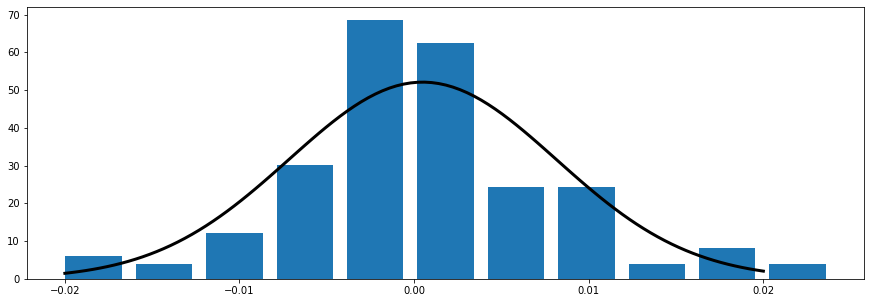

In [43]:
X_tr2 = X_tr_t.drop([x for x in X.columns if '11' in x], axis=1)
X_ts2 = X_ts_t.drop([x for x in X.columns if '11' in x], axis=1)

lasso = LassoLarsCV(normalize=True, max_iter=5_000)
lasso.fit(X_tr2,y_tr_t)

plt.figure(figsize=(15,5))
res = lasso.predict(X_ts2)-y_ts_t
plt.hist(res, bins=11, rwidth=.8, density=True)
def normal(x,m,s):
    return 1/(np.sqrt(2*np.pi)*s) * np.exp((-1/2) * ((x-m)/s)**2)
plt.plot(np.linspace(-0.02,0.02,100), normal(np.linspace(-0.02,0.02,100),res.mean(), res.std(ddof=1)), 'k-', lw=3)

print('Erro absoluto médio: ', f'{np.abs(lasso.predict(X_ts2)-y_ts_t).mean():.3f}')

# Será que funcionou?

In [44]:
order = np.argsort(np.abs(lasso.coef_))[::-1]

indice_novo = 0
coefs = []
for col,coef in zip(X_tr2.columns[order], lasso.coef_[order]/lasso.coef_.sum()):
    if coef==0:
        continue
    print(f'{col:9s} : {coef:.3f}%')
    coefs.append(col)
    indice_novo += X[col] * coef

PETR3     : 0.132%
ITUB3     : 0.099%
BBAS3     : 0.075%
ABEV3     : 0.072%
B3SA3     : 0.071%
VALE3     : 0.066%
BBDC3     : 0.060%
LREN3     : 0.057%
BBSE3     : 0.057%
BRAP3     : 0.054%
HYPE3     : 0.049%
MOVI3     : 0.043%
ITSA3     : 0.032%
BRKM5     : 0.022%
LIGT3     : 0.019%
SBSP3     : 0.013%
LAME3     : 0.012%
SLCE3     : 0.010%
YDUQ3     : 0.010%
RENT3     : 0.010%
WEGE3     : 0.007%
VULC3     : 0.005%
DTEX3     : 0.005%
RADL3     : 0.004%
ELET3     : 0.004%
CVCB3     : 0.003%
BRDT3     : 0.003%
MRVE3     : 0.003%
BRFS3     : 0.002%
CIEL3     : 0.001%
JHSF3     : 0.001%
JBSS3     : 0.001%


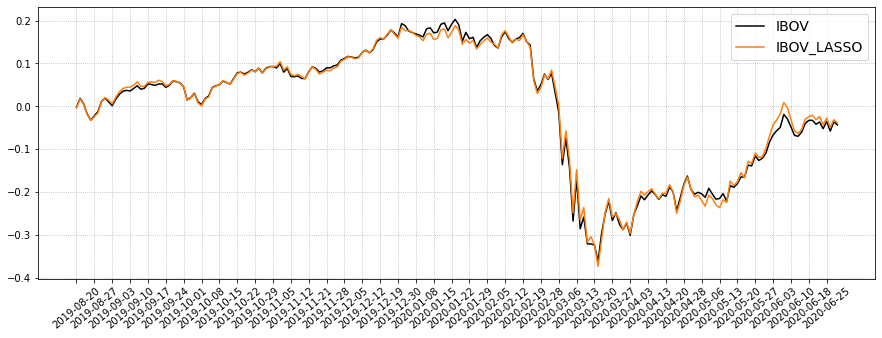

In [45]:
plt.figure(figsize=(15,5))
plt.plot((1+y).cumprod()-1, color='k', label='IBOV')
plt.plot((1+indice_novo).cumprod()-1, color='C1', label='IBOV_LASSO')
plt.xticks(y.index[::5],rotation=40)
plt.grid(linestyle=':')
plt.legend(fontsize=14)

# Ficou bom, mas não replicamos perfeitamente...

### será que falta mais alguma regra de negócio?

Existem ações que são **naturalmente correlacionadas**, mas somente uma entra no índice.

#### O que isso quer dizer?

Por exemplo, vamos pegar 2 papéis famosos, **ITUB3** e **ITSA3**

> **ITUB3** são as ações do **Itaú-Unibanco**.
> 
> Já **ITSA3** são as ações da **Itaú S/A**. 
> - Essa empresa é uma <u>holding</u>: Uma empresa que controla outras empresas (há benefícios fiscais ao fazer isso).
>    - E $90\%$ do patrimônio dela é composto de ações do **ITUB3**
>    - Ou seja, elas **sempre** tendem a andar juntas, com umas diferenças pequenas.

Nosso modelo não tem como diferenciá-las, mas elas têm pesos **completamente diferentes** no índice 

(ref: http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm)

Dependendo da finalidade da nossa interpretação isso pode ou não ser importante.

De qualquer forma, sabemos que quem compra o índice **Está significativamente exposto ao comportamento do Itaú-Unibanco**.

<hr />


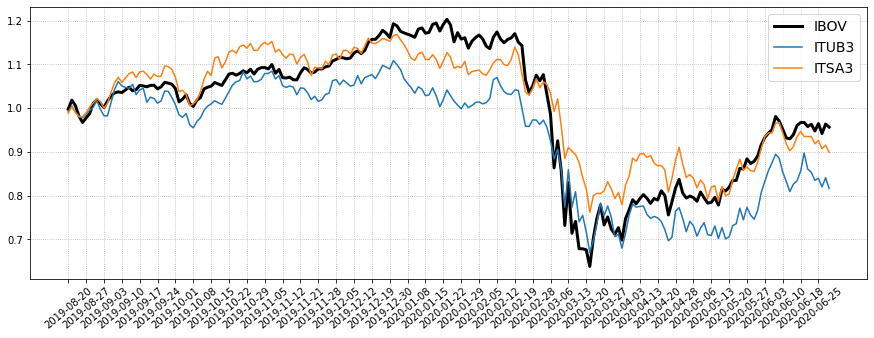

In [23]:
plt.figure(figsize=(15,5))
plt.plot((1+y).cumprod(), color='k', lw=3, label='IBOV')
plt.plot((1+X['ITUB3']).cumprod(), label='ITUB3')
plt.plot((1+X['ITSA3']).cumprod(), label='ITSA3')
plt.xticks(y.index[::5],rotation=40)
plt.grid(linestyle=':')
plt.legend(fontsize=14)


## Mas pera lá!

Ao encontrar os coeficientes utilizando regularização, nossa **função de custo foi otimizada com regularização**.

Isso significa que nossos coeficientes da LASSO **não minimizam o erro**. Essa não é a nossa <u>solução ótima</u>

Para encontrá-la, precisamos **retreinar nosso modelo, só com os papéis com coeficientes não-nulos, sem regularização**:

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True, fit_intercept=True, positive=True)#normalize pode não estar compativel com sua versão do scikit-learn

lr.fit(X_tr_t[coefs], y_tr_t)

LinearRegression(positive=True)

In [46]:
print(np.abs(lr.predict(X_ts_t[coefs])-y_ts_t).mean())

0.004896777231003304


In [47]:
order = np.argsort(np.abs(lr.coef_))[::-1]

indice_novo = 0
for col,coef in zip(X_ts_t[coefs].columns[order], lr.coef_[order]/lr.coef_.sum()):
    if coef==0:
        continue
    print(f'{col:9s} : {coef:.3f}%')
    indice_novo += X[col] * coef

PETR3     : 0.113%
ITUB3     : 0.092%
VALE3     : 0.068%
B3SA3     : 0.062%
ABEV3     : 0.061%
ITSA3     : 0.053%
BBSE3     : 0.053%
BBDC3     : 0.051%
BBAS3     : 0.049%
BRAP3     : 0.039%
RADL3     : 0.036%
HYPE3     : 0.035%
RENT3     : 0.027%
SLCE3     : 0.025%
MOVI3     : 0.024%
BRKM5     : 0.024%
LIGT3     : 0.020%
DTEX3     : 0.019%
BRDT3     : 0.016%
CVCB3     : 0.016%
YDUQ3     : 0.016%
CIEL3     : 0.016%
SBSP3     : 0.014%
BRFS3     : 0.012%
VULC3     : 0.010%
LAME3     : 0.009%
WEGE3     : 0.009%
LREN3     : 0.008%
JBSS3     : 0.008%
ELET3     : 0.007%
JHSF3     : 0.005%
MRVE3     : 0.001%


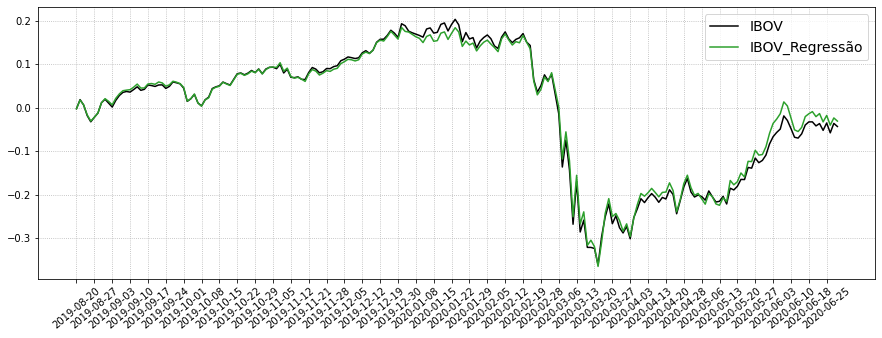

In [48]:
plt.figure(figsize=(15,5))
plt.plot((1+y).cumprod()-1, color='k', label='IBOV')
plt.plot((1+indice_novo).cumprod()-1, color='C2', label='IBOV_Regressão')
plt.xticks(y.index[::5],rotation=40)
plt.grid(linestyle=':')
plt.legend(fontsize=14)